# Distribution of Run Duration Functions Testing

This code works to create a histogram plot to visualize the distribution of the run durations in spiders. We want to compare the distributions of the original data and resampled data (summed by rows of 2).

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
import seaborn as sns

#Read Spider activity CSV file
filename = 'Metazygia wittfeldae Monitor 1 activity_DD_binary_run_duration'
filename2 = "Metazygia wittfeldae Monitor 1 activity_DD_reindex_binary_run_duration"
df = pd.read_csv(filename + '.csv', index_col = 0)
df2 = pd.read_csv(filename2 + '.csv', index_col = 0)

### Histogram Formatting

This function helps format and label our histograms. It creates a skeleton of our graphs and plots them side by side.

In [12]:
def set_histogram(col, plt, axes, ylim):
    # create two histograms side by side: binarized run duration histogram on the left (axis 0) and 
    # resampled binarized run duration histogram on the right (axis 1)
    axes[0].set_title(col)
    axes[1].set_title(col + ' Resampled')
    axes[0].set_xlabel('Run Duration')
    axes[1].set_xlabel('Run Duration')
    axes[0].set_ylim(0, ylim)
    axes[1].set_ylim(0, ylim/2)
    # adjust padding around the histograms
    plt.tight_layout()
    
    return

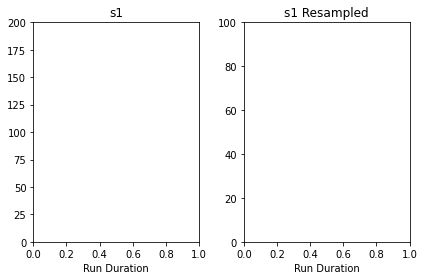

In [13]:
fig, axes = plt.subplots(1, 2)

set_histogram('s1', plt, axes, 200)

### Histogram Drawing

This code works to loop through every column of the dataframe and plot that individual column. We set the bins so that our data stays within the same range and is easy to compare. We call the previous function and now feed data into the histograms. Histograms are then saved into .jpeg file.

In [17]:
def show_all_histograms(df):
    # set bins and y-axis limit
    bin_size = np.arange(0, 30, 2, dtype= int)
    ylim = 200
    
    # loop through dataframe columns to plot each column
    for i, col in enumerate(df.columns):
        fig, axes = plt.subplots(1, 2)
        fig.suptitle('DD Run Duration Distribution')
        set_histogram(col, plt, axes, ylim)
        
        # create histogram with data from dataframe
        sns.histplot(data = df, x = col, ax = axes[0], bins = bin_list)
        sns.histplot(data = df2, x = col, ax = axes[1], bins = bin_list)

        plt.savefig(col + "_DD.jpeg")

    return

/var/folders/jt/ss6zd2nx0bv4h_3q_d2qtldm0000gn/T/ipykernel_19427/2067495540.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(1, 2)


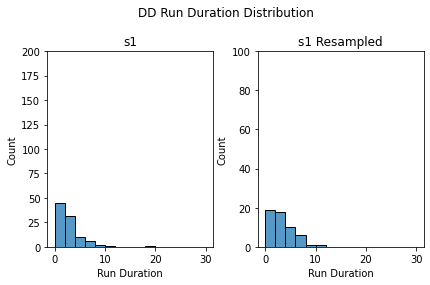

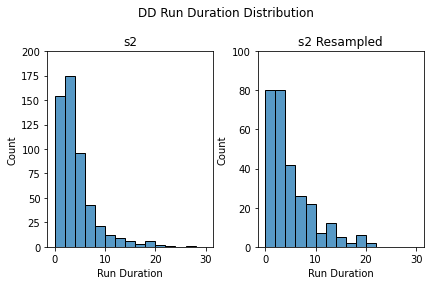

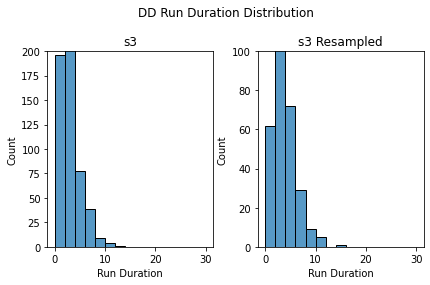

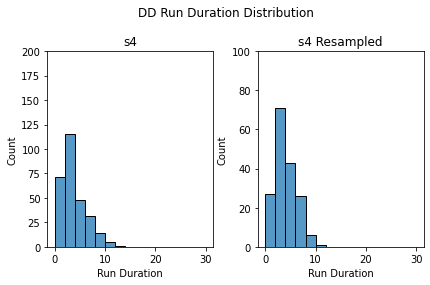

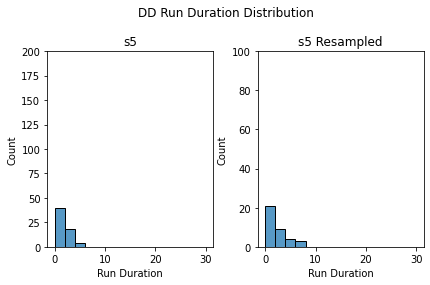

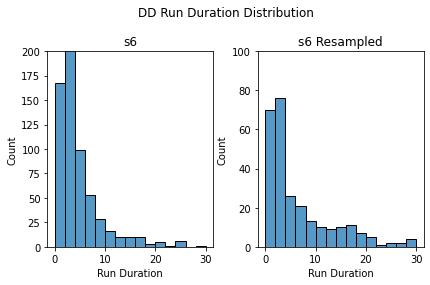

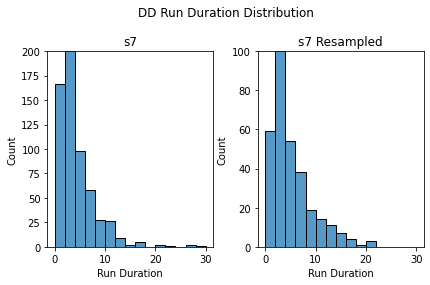

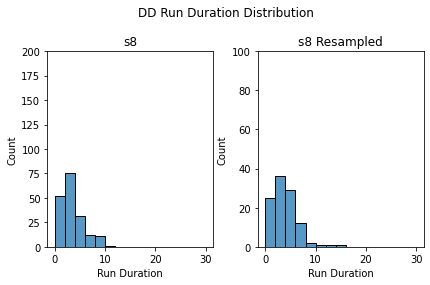

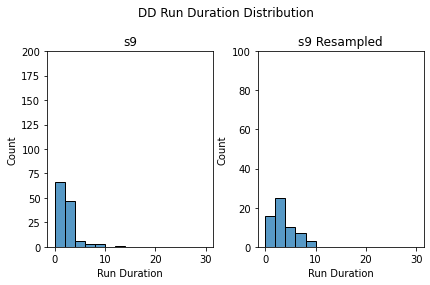

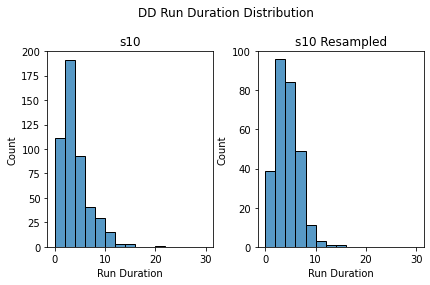

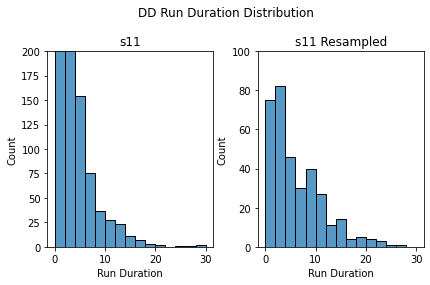

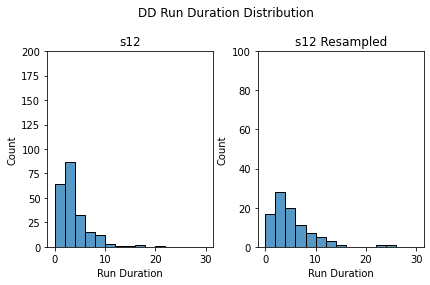

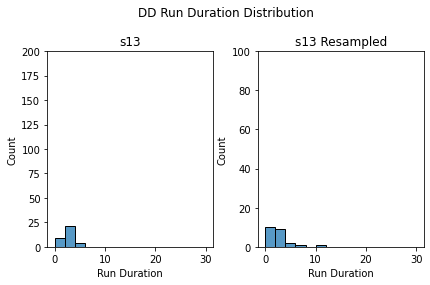

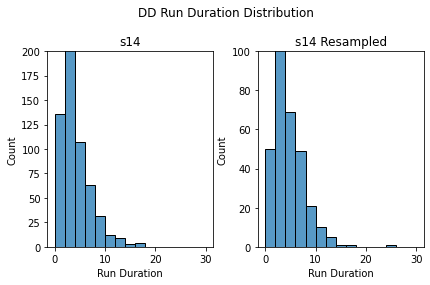

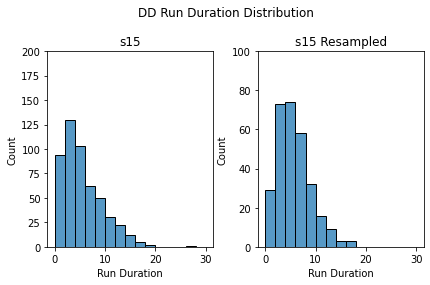

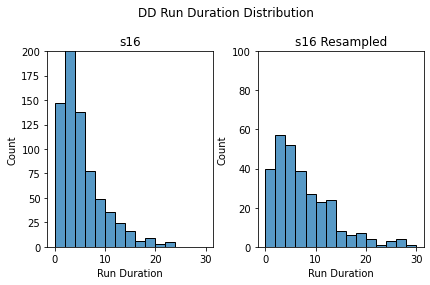

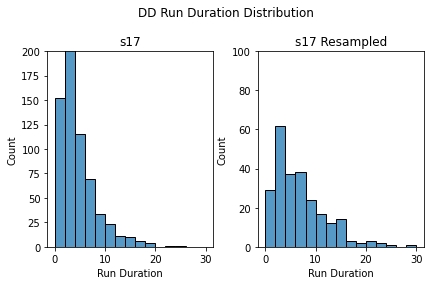

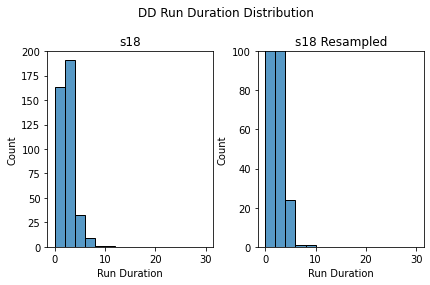

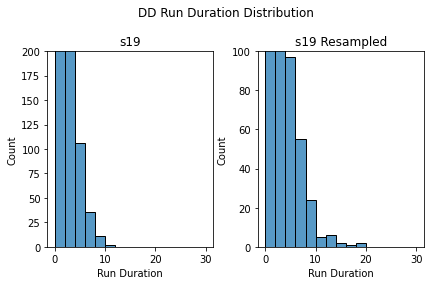

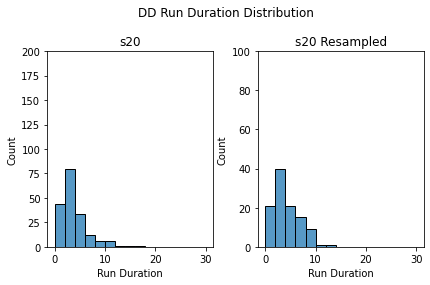

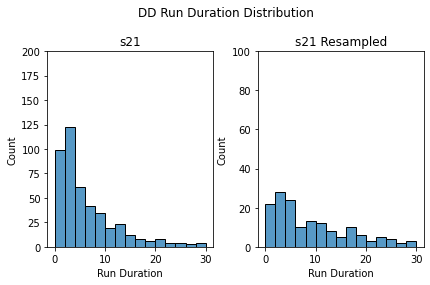

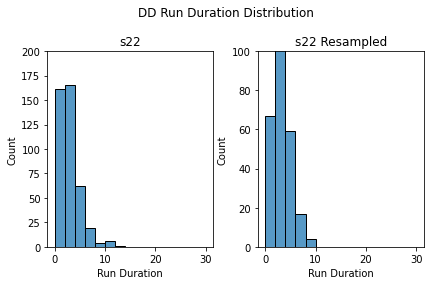

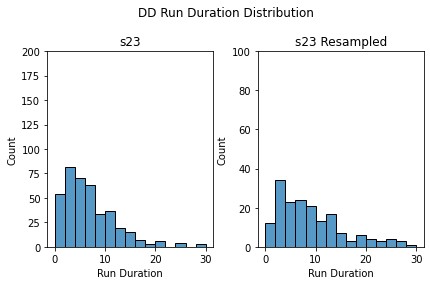

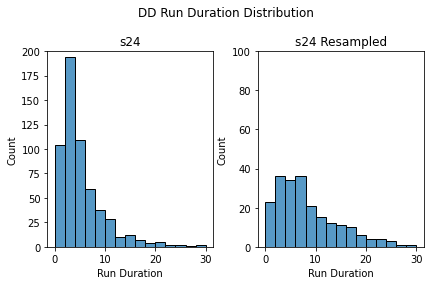

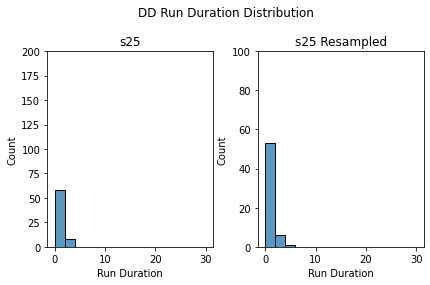

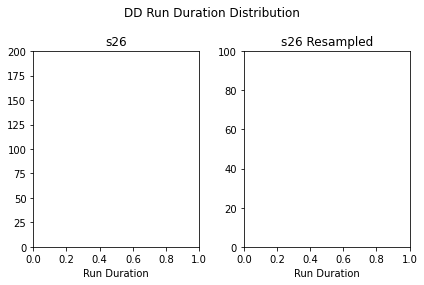

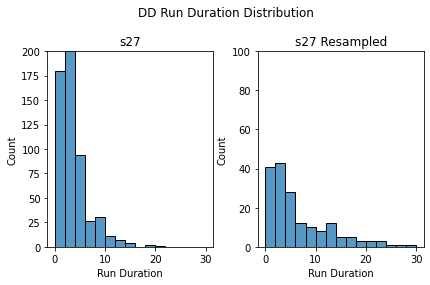

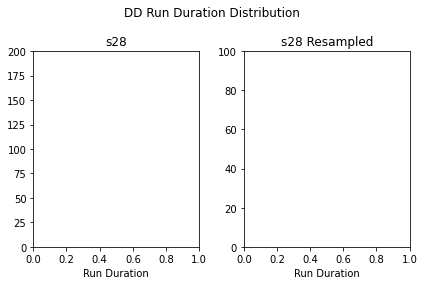

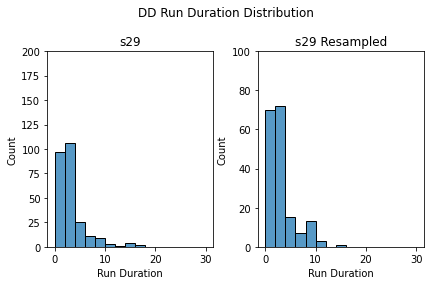

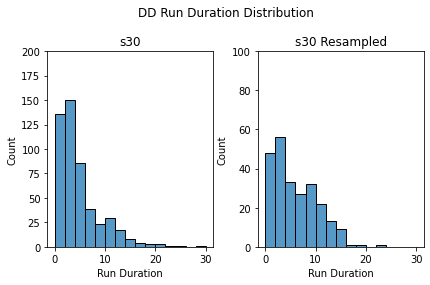

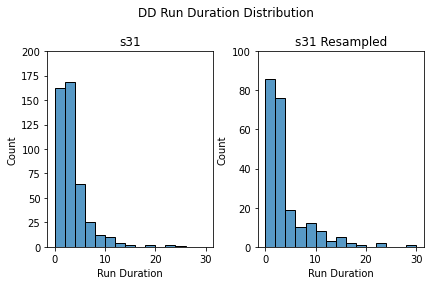

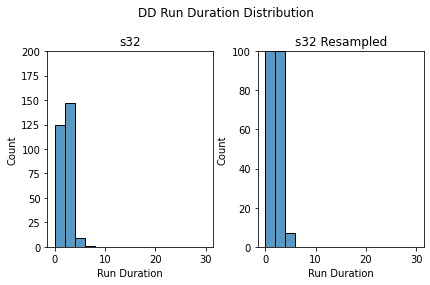

In [18]:
show_all_histograms(df)